Graph generation for Vermont performance analysis

In [1]:
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# MATPLOTLIB AND SEABORN
import matplotlib.pylab as pylab
from matplotlib.patches import Rectangle
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

%matplotlib inline
# %matplotlib notebook

pylab.rcParams['font.size'] = 24
pylab.rcParams['figure.figsize'] = [3*x for x in [3.52, 2.64]]
pylab.rcParams['figure.dpi'] = 100
pylab.rcParams['errorbar.capsize'] = 3
pylab.rcParams['legend.fontsize'] = 12
pylab.rcParams['lines.linewidth'] = 2

gridcolor = '#bbbbbb'

zvalue = 2.576  # 99%

EXP_NUM = 34

Plotting helper function

In [2]:
def plot_bars(dfs, networks, plots, xlabel, ylabel, stack=True, yscale=None, ylim=None, roundto=2):
    fig = pylab.figure()
    info = ''

    x = np.array(range(len(networks)))

    if stack is False:
        total_plots = 0
        for plot in plots:
            total_plots = total_plots + len(plot['ys'])
    else:
        total_plots = len(plots)
    barwidth = 1/(total_plots + 1.5)

    i = 0
    for plot in plots:
        lbls = plot['labels']
        ys = plot['ys']
        hatches = plot['hatches']
        if len(hatches) != len(ys):
            raise Exception
        colors = plot['colors']
        if len(colors) != len(ys):
            raise Exception
        yerrs = plot['yerrs'] if plot['yerrs'] is not None else [None]*len(ys)
        ymaxs = plot['ymaxs'] if plot['ymaxs'] is not None else [None]*len(ys)

        ybot = np.zeros(len(networks))

        for plabel, ylbl, yhatch, ycolor, yerrlbl, ymaxlbl in zip(lbls, ys, hatches, colors, yerrs, ymaxs):
            y = np.zeros(len(networks))
            if yerrlbl is not None:
                yerr = np.zeros(len(networks))
            else:
                yerr = None
            if ymaxlbl is not None:
                ymax = np.zeros(len(networks))
            else:
                ymax = None
            for j, net in enumerate(networks):
                y[j] = plot['yadjust'](dfs[plot['id']][ylbl].loc[net['id']], dfs, net['id'])
                if yerrlbl is not None:
                    yerr[j] = plot['yadjust'](dfs[plot['id']][yerrlbl].loc[net['id']], dfs, net['id'])
                if ymaxlbl is not None:
                    ymax[j] = plot['yadjust'](dfs[plot['id']][ymaxlbl].loc[net['id']], dfs, net['id'])
            pylab.bar(x=x + i*barwidth, height=y, yerr=yerr, bottom=ybot, width=barwidth, align='edge', edgecolor='k', capsize=5, label=plabel, hatch=yhatch, color=ycolor)
            if ymaxlbl is not None:
                pylab.scatter(x + i*barwidth + barwidth*0.5, ymax, marker='o', color=ycolor, edgecolor='k', s=50)
            if stack is True:
                ybot = ybot + y
            else:
                i = i + 1
            info += '# {}\ny: {}\n'.format(plabel, [round(a, roundto) for a in y])
            if yerrlbl is not None:
                info += 'yerr: {}\n'.format([round(a, roundto) for a in yerr])
            if ymaxlbl is not None:
                info += 'ymax: {}\n'.format([round(a, roundto) for a in ymax])
            info += '\n'
        
        if stack:
            info += '{} => ybot: {}\n\n'.format(plot['id'], [round(a, roundto) for a in ybot])
        
        i = i + 1
        if stack is False:
            i = i - 1
    
    pylab.xlabel(xlabel)
#     pylab.xticks(x + (barwidth*total_plots*0.5), [net['label'] for net in networks], rotation=0, fontsize=18)
    pylab.xticks(x + (barwidth*total_plots*0.5), [net['name'] for net in networks], rotation=0, fontsize=18)
    pylab.ylabel(ylabel)
    pylab.yticks(fontsize=18)
            
    pylab.legend(loc='upper left', fontsize=16)
    ax1 = fig.gca()
    ax1.set_axisbelow(True)
    ax1.grid(ls=':', axis='y', which='both', c=gridcolor)
    ax1.tick_params(axis='x', which='both',length=0)

    if yscale is not None:
        pylab.yscale(yscale)
    else:
        ax1.yaxis.set_minor_locator(MultipleLocator(10))
    if ylim is not None:
        pylab.ylim(ylim[0], ylim[1])
    pylab.tight_layout()
    return fig, info

Reachability calculation

In [3]:
dtimes_0 = []
dtimes_10 = []
dtimes_1000 = []
dtimes_100 = []
dtimes_100 = []
dtimes_i0 = []
dtimes_i10 = []
dtimes_i100 = []
dtimes_i1000 = []

for i in range(0,EXP_NUM):

    senders = {}
    results = {}
    receivers = []
    last_sender = ''
    last_receiver = ''
    dtimes = []

    with open('Outcomes-0/Reachability/Exp{}/results/sender.json'.format(i)) as f:
        senders = json.load(f)

    with open('Outcomes-0/Reachability/Exp{}/results/1result.json'.format(i)) as f:
        results = json.load(f)
    c = 0
    for x in results:
        for a in results[x]:
            if a["processing_times"] != []:
                receivers.append(datetime.strptime(a["processing_times"][0], "%H:%M:%S.%f"))
            else:
                c += 1

    last_sender = datetime.strptime(senders["0"][len(senders["0"])-1], "%H:%M:%S.%f")

    receivers.sort()

    last_receiver = receivers[len(receivers)-1]
    dtimes_0.append((last_receiver-last_sender).total_seconds())

for i in range(0,EXP_NUM):

    senders = {}
    results = {}
    receivers = []
    last_sender = ''
    last_receiver = ''
    dtimes = []

    with open('Outcomes-10/Reachability/Exp{}/results/sender.json'.format(i)) as f:
        senders = json.load(f)

    with open('Outcomes-10/Reachability/Exp{}/results/1result.json'.format(i)) as f:
        results = json.load(f)
    c = 0
    for x in results:
        for a in results[x]:
            if a["processing_times"] != []:
                receivers.append(datetime.strptime(a["processing_times"][0], "%H:%M:%S.%f"))
            else:
                c += 1

    last_sender = datetime.strptime(senders["0"][len(senders["0"])-1], "%H:%M:%S.%f")

    receivers.sort()

    last_receiver = receivers[len(receivers)-1]
    dtimes_10.append((last_receiver-last_sender).total_seconds())

for i in range(0,EXP_NUM):

    senders = {}
    results = {}
    receivers = []
    last_sender = ''
    last_receiver = ''
    dtimes = []

    with open('Outcomes-100/Reachability/Exp{}/results/sender.json'.format(i)) as f:
        senders = json.load(f)

    with open('Outcomes-100/Reachability/Exp{}/results/1result.json'.format(i)) as f:
        results = json.load(f)
    c = 0
    for x in results:
        for a in results[x]:
            if a["processing_times"] != []:
                receivers.append(datetime.strptime(a["processing_times"][0], "%H:%M:%S.%f"))
            else:
                c += 1

    last_sender = datetime.strptime(senders["0"][len(senders["0"])-1], "%H:%M:%S.%f")

    receivers.sort()

    last_receiver = receivers[len(receivers)-1]
    dtimes_100.append((last_receiver-last_sender).total_seconds())

for i in range(0,EXP_NUM):

    senders = {}
    results = {}
    receivers = []
    last_sender = ''
    last_receiver = ''
    dtimes = []

    with open('Outcomes-1000/Reachability/Exp{}/results/sender.json'.format(i)) as f:
        senders = json.load(f)

    with open('Outcomes-1000/Reachability/Exp{}/results/1result.json'.format(i)) as f:
        results = json.load(f)
    c = 0
    for x in results:
        for a in results[x]:
            if a["processing_times"] != []:
                receivers.append(datetime.strptime(a["processing_times"][0], "%H:%M:%S.%f"))
            else:
                c += 1

    last_sender = datetime.strptime(senders["0"][len(senders["0"])-1], "%H:%M:%S.%f")

    receivers.sort()

    last_receiver = receivers[len(receivers)-1]
    dtimes_1000.append((last_receiver-last_sender).total_seconds())
    
#bf

for i in range(0, EXP_NUM):
    with open("OutcomesBatfish/Reachability/Exp{}/result".format(i,i)) as f:
        l  = f.readline()
        dtimes_i0.append(float(l[:-1]))

for i in range(0, EXP_NUM):
    with open("OutcomesBatfish-10/Reachability/Exp{}/result".format(i,i)) as f:
        l  = f.readline()
        dtimes_i10.append(float(l[:-1]))

for i in range(0, EXP_NUM):
    with open("OutcomesBatfish-100/Reachability/Exp{}/result".format(i,i)) as f:
        l  = f.readline()
        dtimes_i100.append(float(l[:-1]))

for i in range(0, EXP_NUM):
    with open("OutcomesBatfish-1000/Reachability/Exp{}/result".format(i,i)) as f:
        l  = f.readline()
        dtimes_i1000.append(float(l[:-1]))


import scipy.stats

def mean_confidence_interval(data, confidence=0.99):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h
    

Generating graphs for reachability

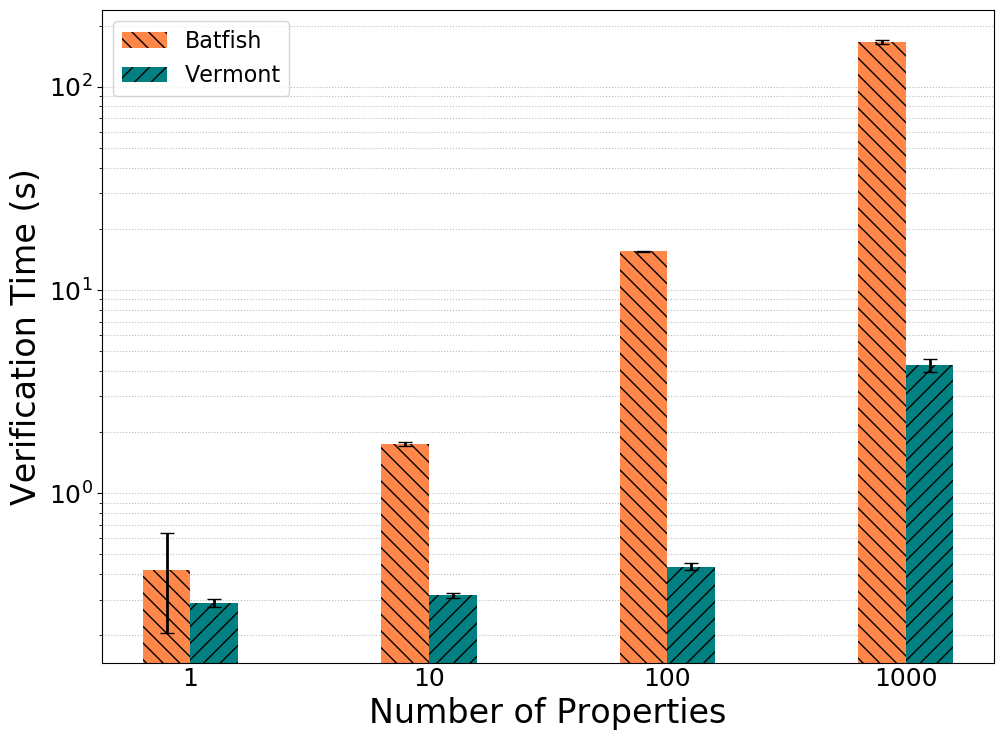

In [99]:
X = [1,10,100,1000]
vermont = [np.mean(dtimes_0),np.mean(dtimes_10),np.mean(dtimes_100),np.mean(dtimes_1000)]
verror = [mean_confidence_interval(dtimes_0),mean_confidence_interval(dtimes_10),mean_confidence_interval(dtimes_100),mean_confidence_interval(dtimes_1000)]
batfish = [np.mean(dtimes_i0),np.mean(dtimes_i10),np.mean(dtimes_i100),np.mean(dtimes_i1000)]
berror = [mean_confidence_interval(dtimes_i0),mean_confidence_interval(dtimes_i10),mean_confidence_interval(dtimes_i100),mean_confidence_interval(dtimes_i1000)]

fig = pylab.figure()

X_axis = np.arange(len(X))

pylab.bar(X_axis - 0.2, height=batfish, yerr=berror, width=0.2, align='edge', capsize=5, label='Batfish', color='#ff8749', hatch='\\\\')
pylab.bar(X_axis, height=vermont, yerr=verror, width=0.2, align='edge', capsize=5, label='Vermont', color='#008080', hatch='//')

pylab.xlabel("Number of Properties")
pylab.xticks(X_axis, X, rotation=0, fontsize=18)
pylab.ylabel("Verification Time (s)")
pylab.yticks(fontsize=18)
        
pylab.legend(loc='upper left', fontsize=16)
ax1 = fig.gca()
ax1.set_axisbelow(True)
ax1.grid(ls=':', axis='y', which='both', c=gridcolor)
ax1.tick_params(axis='x', which='both',length=0)


pylab.yscale('log')

pylab.tight_layout()

pylab.savefig('fig.pdf')
